In [1]:
import numpy as np


data = np.load('data.npy')
target = np.load('target.npy')

#loading of the saved numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# The first CNN Layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# The second CNN Layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
# Flatten layer used to stack the output convolutions from the second convolution layer
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
# The final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 46s 1s/step - loss: 0.7027 - accuracy: 0.5434 - val_loss: 0.6677 - val_accuracy: 0.5565
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
31/31 [==============================] - 46s 1s/step - loss: 0.6321 - accuracy: 0.6323 - val_loss: 0.5158 - val_accuracy: 0.7661
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
31/31 [==============================] - 45s 1s/step - loss: 0.4593 - accuracy: 0.7697 - val_loss: 0.3601 - val_accuracy: 0.8548
INFO:tensorflow:Assets written to: model-003.model\assets
Epoch 4/20
31/31 [==============================] - 45s 1s/step - loss: 0.3320 - accuracy: 0.8677 - val_loss: 0.2416 - val_accuracy: 0.8992
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
31/31 [==============================] - 46s 1s/step - loss: 0.2362 - accuracy: 0.9101 - val_loss: 0.1954 - val_accuracy: 0.9355
INFO:tensorflow:Assets written to: model-005.model\assets
Epoch 6/20

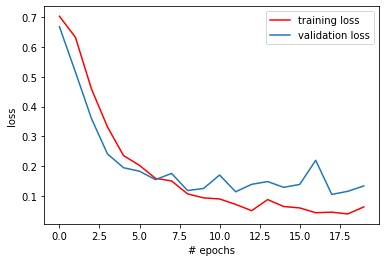

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

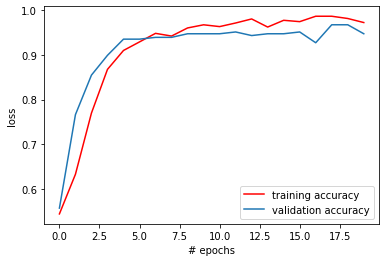

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 346ms/step - loss: 0.1787 - accuracy: 0.9493
[0.1786673367023468, 0.9492753744125366]
